1. Підготовка даних

In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:02<00:00, 3.59MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 255kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.37MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.47MB/s]


2. Створення генератора і дискримінатора

In [2]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256), nn.ReLU(),
            nn.Linear(256, 512), nn.ReLU(),
            nn.Linear(512, 1024), nn.ReLU(),
            nn.Linear(1024, 28*28), nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512), nn.LeakyReLU(0.2),
            nn.Linear(512, 256), nn.LeakyReLU(0.2),
            nn.Linear(256, 1), nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

3. Ініціалізація моделей та функцій втрат

In [5]:
import torch.optim as optim


G = Generator()
D = Discriminator()
loss_fn = nn.BCELoss()
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)

4. Навчання GAN

In [10]:
import torch


for epoch in range(30):
    for real_imgs, _ in train_loader:
        real_imgs = real_imgs.view(-1, 28*28)
        batch_size = real_imgs.size(0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Тренування дискримінатора
        z = torch.randn(batch_size, 100)
        fake_imgs = G(z)
        d_loss_real = loss_fn(D(real_imgs), real_labels)
        d_loss_fake = loss_fn(D(fake_imgs.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Тренування генератора
        g_loss = loss_fn(D(fake_imgs), real_labels)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch {epoch+1}, D loss: {d_loss.item():.4f}, G loss: {g_loss.item():.4f}")

Epoch 1, D loss: 0.9015, G loss: 1.7124
Epoch 2, D loss: 0.7010, G loss: 2.2510
Epoch 3, D loss: 0.5427, G loss: 2.5838
Epoch 4, D loss: 0.5156, G loss: 2.2302
Epoch 5, D loss: 0.9464, G loss: 3.0659
Epoch 6, D loss: 0.9658, G loss: 2.5642
Epoch 7, D loss: 0.9123, G loss: 2.3110
Epoch 8, D loss: 0.5438, G loss: 2.9386
Epoch 9, D loss: 0.6515, G loss: 1.5238
Epoch 10, D loss: 1.3988, G loss: 1.3406
Epoch 11, D loss: 0.9785, G loss: 1.8189
Epoch 12, D loss: 0.5665, G loss: 2.2452
Epoch 13, D loss: 1.0431, G loss: 2.5652
Epoch 14, D loss: 0.7032, G loss: 2.0557
Epoch 15, D loss: 0.8831, G loss: 1.5411
Epoch 16, D loss: 0.8655, G loss: 1.5239
Epoch 17, D loss: 0.7527, G loss: 2.5265
Epoch 18, D loss: 1.0347, G loss: 1.5314
Epoch 19, D loss: 0.9480, G loss: 1.7555
Epoch 20, D loss: 1.3479, G loss: 1.3798
Epoch 21, D loss: 1.2567, G loss: 1.5804
Epoch 22, D loss: 0.9740, G loss: 1.3645
Epoch 23, D loss: 0.7346, G loss: 1.8424
Epoch 24, D loss: 0.8172, G loss: 1.9670
Epoch 25, D loss: 1.0854,

5. Візуалізація результатів генерації

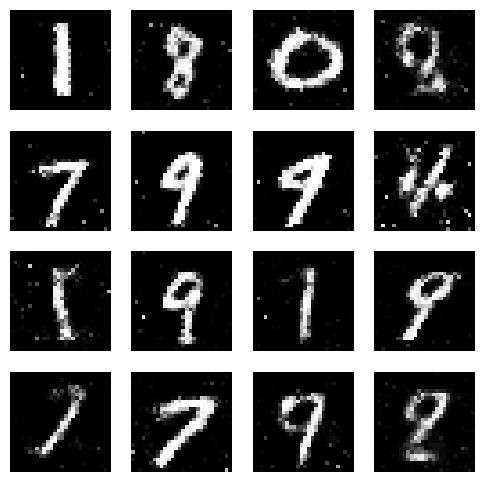

In [11]:
import matplotlib.pyplot as plt


z = torch.randn(16, 100)
samples = G(z).view(-1, 28, 28).detach()
fig, axes = plt.subplots(4, 4, figsize=(6, 6))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i], cmap='gray')
    ax.axis('off')

plt.show()

Контрольні питання
1. Що таке GAN і з чого вона складається?

Generative Adversarial Network (GAN) — це тип генеративної нейромережі, що складається з двох компонентів: генератора (Generator) і дискримінатора (Discriminator). Генератор навчається створювати нові зразки, подібні до реальних даних, використовуючи випадковий вхід (шум). Дискримінатор, своєю чергою, намагається відрізнити справжні дані від згенерованих. Під час навчання обидві моделі вдосконалюються: генератор намагається "обдурити" дискримінатор, а дискримінатор навчається краще виявляти фейки. Успішно натреновані GAN можуть створювати реалістичні зображення, відео, синтез мовлення та застосовуються навіть у біоінформатиці чи дизайні нових матеріалів.

2. У чому полягає змагання між G і D?

Змагання в GAN — це гра з нульовою сумою між двома моделями. Генератор (G) намагається створити фейкові зразки, які дискримінатор (D) не зможе відрізнити від справжніх. D отримує як вхід і справжні, і згенеровані зразки, та вчиться класифікувати їх правильно. G, своєю чергою, отримує сигнал зворотного зв’язку від D і намагається поліпшити свої зразки, аби обдурити D. Ідеальне навчання досягається, коли дискримінатор уже не може з впевненістю відрізнити справжні та фейкові дані (тобто ймовірність відрізнити — 50%).

3. Яку роль відіграє функція втрат у GAN?

Функція втрат визначає, як добре кожна з моделей виконує своє завдання:

    Дискримінатор мінімізує свою втрату, правильно класифікуючи реальні та фейкові зразки.

    Генератор намагається максимізувати втрату дискримінатора, тобто створює зразки, які той помилково вважає справжніми.
    Класична функція втрат ґрунтується на крос-ентропії, але для більш стабільного навчання застосовують й альтернативи, наприклад, у Wasserstein GAN використовується відстань Васерштейна (Earth Mover’s Distance), що забезпечує кращу збіжність.

4. Як уникнути mode collapse?

Mode collapse — це проблема, коли генератор починає створювати однакові або дуже схожі зразки, втрачаючи різноманітність. Щоб запобігти цьому, застосовують:

    Мінібатч-дискримінацію — оцінювання схожості між зразками всередині батчу.

    Feature matching — замість обману D, генератор намагається відтворити статистики ознак, які D обчислює.

    Wasserstein GAN (WGAN) — використовує іншу функцію втрат, що сприяє стабільному навчанню.

    Unrolled GAN — частково розгортає кроки навчання D, щоб надати G більше контексту.

    Регуляризація та шум — додавання випадковості або Dropout зменшує переадаптацію.

    Прогресивне навчання — поступове збільшення розміру зображення під час тренування, щоб забезпечити стабільну
5. У чому полягає різниця між генератором і дискримінатором?

| Характеристика   | Генератор (G)                                   | Дискримінатор (D)                               |
|-----------------|-----------------------------------------------|-----------------------------------------------|
| **Призначення**  | Створює нові зразки даних                     | Розрізняє справжні та згенеровані дані       |
| **Вхідні дані**  | Випадковий шум                                | Реальні та згенеровані дані                  |
| **Вихідні дані** | Синтезовані (підроблені) зразки               | Ймовірність того, що зразок справжній        |
| **Мета навчання** | Обманути дискримінатор, створюючи реалістичні дані | Правильно розпізнавати справжні та підроблені дані |
| **Оптимізація**  | Прагне максимізувати помилку дискримінатора   | Мінімізує власну помилку класифікації        |
| **Оновлення ваг** | Оновлюється так, щоб покращувати якість генерації | Оновлюється так, щоб краще розпізнавати підробки |
